# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.641  1  1.173 0.280 0.006   
                             age        0.040  1  0.072 0.788 0.000   
                             Kiel       1.792  1  3.278 0.072 0.017   
                             Magdeburg  4.448  1  8.135 0.005 0.041   
                             Sweden     7.001  1 12.803 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.144  1  0.170 0.680 0.001   
                             age        0.798  1  0.942 0.333 0.005   
                             Kiel       0.001  1  0.002 0.968 0.000   
                             Magdeburg  2.118  1  2.500 0.115 0.013   
                             Sweden    12.969  1 15.309 0.000 0.074   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.553  0.439    False  
                             age               0.103  0.868    False  
                             Kiel              1.144  0.161    False  
                             Magdeburg         2.317  0.018     True  
                             Sweden            3.358  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.167  0.793    False  
                             age               0.478  0.496    False  
                             Kiel              0.014  0.984    False  
                             Magdeburg         0.937  0.232    False  
                             Sweden            3.897  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.633  1  4.052 0.046 0.021   
                             age        0.015  1  0.097 0.755 0.001   
                             Kiel       0.415  1  2.653 0.105 0.014   
                             Magdeburg  0.925  1  5.917 0.016 0.030   
                             Sweden     2.433  1 15.565 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.753  1  1.044 0.308 0.005   
                             age        2.008  1  1.196 0.275 0.006   
                             Kiel       9.194  1  5.475 0.020 0.028   
                             Magdeburg 13.730  1  8.176 0.005 0.041   
                             Sweden     0.712  1  0.424 0.516 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.342  0.105    False  
                             age               0.122  0.839    False  
                             Kiel              0.979  0.204    False  
                             Magdeburg         1.798  0.045     True  
                             Sweden            3.951  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.511  0.456    False  
                             age               0.560  0.422    False  
                             Kiel              1.692  0.055    False  
                             Magdeburg         2.326  0.016     True  
                             Sweden            0.288  0.655    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.280         0.553  0.439    False   
                             Kiel      0.072         1.144  0.161    False   
                             Magdeburg 0.005         2.317  0.018     True   
                             Sweden    0.000         3.358  0.002     True   
                             age       0.788         0.103  0.868    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.680         0.167  0.793    False   
                             Kiel      0.968         0.014  0.984    False   
                             Magdeburg 0.115         0.937  0.232    False   
                             Sweden    0.000         3.897  0.001     True   
                             age       0.333         0.478  0.496    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.046         1.342  0.105    False  
                             Kiel      0.105         0.979  0.204    False  
                             Magdeburg 0.016         1.798  0.045     True  
                             Sweden    0.000         3.951  0.001     True  
                             age       0.755         0.122  0.839    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.308         0.511  0.456    False  
                             Kiel      0.020         1.692  0.055    False  
                             Magdeburg 0.005         2.326  0.016     True  
                             Sweden    0.516         0.288  0.655    False  
                             age       0.275         0.560  0.422    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.488     0.335     0.246         2.747     0.312
std       0.303         5.380     0.330     0.299         5.182     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.015     0.002         0.361     0.009
50%       0.118         0.930     0.235     0.091         1.039     0.183
75%       0.463         2.424     0.617     0.435         2.671     0.580
max       1.000       146.777     1.000     1.000        85.433     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48742/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.280         0.553   
A0A024R0T9;K7ER74;P02655                           AD     0.041         1.383   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.133         0.877   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.411         0.386   
A0A075B6H7                                         AD     0.097         1.014   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.070         1.152   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.273         0.564   
S4R3U6                                             AD     0.680         0.167   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.439    False   
A0A024R0T9;K7ER74;P02655                           AD      0.105    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.257    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.572    False   
A0A075B6H7                                         AD      0.203    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.312    False   
Q9Y6X5                                             AD      0.159    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.431    False   
S4R3U6                                             AD      0.793    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.046         1.342   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.540   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.320         0.495   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.293         0.534   
A0A075B6H7                                         AD     0.194         0.712   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.085         1.069   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.957         0.019   
S4R3U6                                             AD     0.308         0.511   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.105    False  
A0A024R0T9;K7ER74;P02655                           AD      0.073    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.469    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.439    False  
A0A075B6H7                                         AD      0.326    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.400     0.335     0.245         1.495     0.317
std       0.291         1.611     0.316     0.289         1.763     0.315
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.011         0.359     0.038     0.009         0.370     0.028
50%       0.127         0.897     0.249     0.104         0.985     0.202
75%       0.437         1.942     0.595     0.426         2.041     0.573
max       0.999        21.573     1.000     0.997        24.148     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,991


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.280         0.553  0.439   
A0A024R0T9;K7ER74;P02655                           0.041         1.383  0.105   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.133         0.877  0.257   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.411         0.386  0.572   
A0A075B6H7                                         0.097         1.014  0.203   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.312   
Q9Y6X5                                             0.070         1.152  0.159   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.273         0.564  0.431   
S4R3U6                                             0.680         0.167  0.793   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.046   
A0A024R0T9;K7ER74;P02655                              False 0.029   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.320   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.293   
A0A075B6H7                                            False 0.194   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.085   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.957   
S4R3U6                                                False 0.308   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.342  0.105   
A0A024R0T9;K7ER74;P02655                                   1.540  0.073   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.495  0.469   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.534  0.439   
A0A075B6H7                                                 0.712  0.326   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.069  0.173   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.019  0.974   
S4R3U6                                                     0.511  0.456   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    961
PI (yes) - QRILC (yes)   361
PI (no)  - QRILC (yes)    69
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48742/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.019         1.728  0.056    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.010         1.989  0.034     True   
A0A087WWT2;Q9NPD7                     0.036         1.447  0.094    False   
A0A087X1G7;A0A0B4J1S4;O60613          0.047         1.326  0.116    False   
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2 0.009         2.048  0.031     True   
...                                     ...           ...    ...      ...   
Q9BWS9                                0.055         1.258  0.131    False   
Q9NY15                                0.310         0.509  0.472    False   
Q9NYX4                                0.076         1.118  0.169    False   
Q9P0K9                                0.017         1.772  0.052    False   
Q9UQ52                                0.037         1.432  0.096    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.721  0.008     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.045         1.348  0.104    False   
A0A087WWT2;Q9NPD7                     0.006         2.248  0.019     True   
A0A087X1G7;A0A0B4J1S4;O60613          0.018         1.751  0.049     True   
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2 0.045         1.342  0.105    False   
...                                     ...           ...    ...      ...   
Q9BWS9                                0.012         1.924  0.035     True   
Q9NY15                                0.010         2.001  0.030     True   
Q9NYX4                                0.007         2.154  0.023     True   
Q9P0K9                                0.012         1.929  0.035     True   
Q9UQ52                                0.004         2.411  0.014     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087X1G7;A0A0B4J1S4;O60613                184  
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2        92  
...                                         ...  
Q9BWS9                                      146  
Q9NY15                                      135  
Q9NYX4                                      195  
Q9P0K9                                      192  
Q9UQ52                                      188  

[99 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.439,0.105,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.105,0.073,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.257,0.469,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.572,0.439,196,PI (no) - QRILC (no)
A0A075B6H7,0.203,0.326,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.312,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.159,0.173,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.953,0.037,89,PI (no) - QRILC (yes),0.916
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.868,0.001,86,PI (no) - QRILC (yes),0.867
F2Z2C8;Q9BVH7,0.743,0.017,93,PI (no) - QRILC (yes),0.727
A0A0A0MTI5;B8ZWD1;P07108;P07108-2;P07108-3;P07108-4;P07108-5,0.748,0.050,192,PI (no) - QRILC (yes),0.698
P17302,0.637,0.013,135,PI (no) - QRILC (yes),0.624
...,...,...,...,...,...
Q7Z7H5;Q7Z7H5-3,0.036,0.059,176,PI (yes) - QRILC (no),0.023
Q9P0K9,0.052,0.035,192,PI (no) - QRILC (yes),0.017
Q14697;Q14697-2,0.044,0.060,192,PI (yes) - QRILC (no),0.016


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


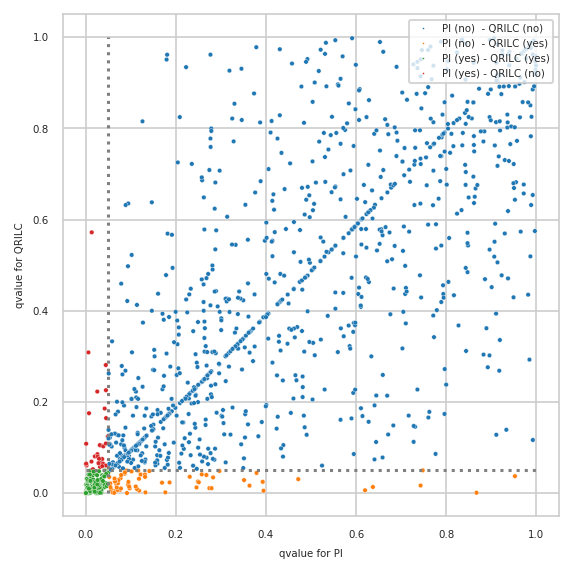

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


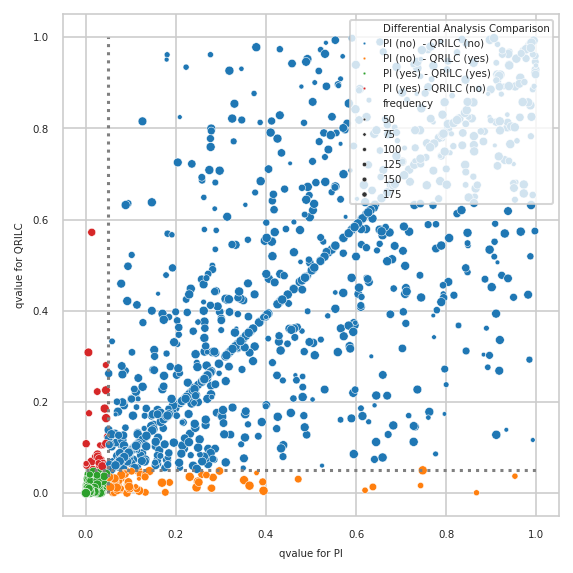

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AASS,ENSP00000403768,0.681
STK26,ENSP00000377867,0.681
FRAT2,ENSP00000360058,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out